In [ ]:
#Data_Source
#https://www.kaggle.com/datasets/veleon/ham-and-spam-dataset

In [2]:
from keras.utils import pad_sequences

from keras.preprocessing.text import Tokenizer


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import os

from sklearn.utils import shuffle

In [15]:
path = 'C:/Users/Maalaoui/Desktop/spam_ham/'
mails = []
labels = []

for label in ['spam/', 'ham/'] :
    
    f_name  = os.listdir(os.path.join(path,label))
    
    for name in f_name :
        f = open((path + label + name), 'r', encoding = 'latin-1')
        bolk = f.read()
        mails.append(bolk)
        labels.append(label[:-1])
        
df = pd.DataFrame({'emails' : mails, 'label':labels})

data = shuffle(df)

In [61]:
labels= LabelEncoder().fit_transform(data['label'])
labels= labels.reshape(-1,1)

labels.shape

(3052, 1)

In [62]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(data['emails'])
sequences = tok.texts_to_sequences(data['emails'])

data_seq = pad_sequences(sequences,maxlen=max_len,padding='post')

In [63]:
x_train,x_test,train_label,test_label=train_test_split(data_seq,labels,test_size=0.33,random_state=0)

In [18]:

####################fonction that return different metrics values#########################
def metric(name,model,x_train,train_label,test_label,pred):
 global plt
 from sklearn.metrics import accuracy_score
 ACC=accuracy_score(test_label, pred)*100
 print('accuracy_score for %s '%name,ACC)
 #########################################################
 from sklearn.metrics import confusion_matrix
 class_names=[0,1] 
 plt.figure(1)
 fig, ax = plt.subplots()
 tick_marks = np.arange(len(class_names))
 plt.xticks(tick_marks, class_names)  
 plt.yticks(tick_marks, class_names)
 sns.heatmap(pd.DataFrame(confusion_matrix(test_label,pred)), annot=True, cmap="YlGnBu" ,fmt='g')
 ax.xaxis.set_label_position("top")
 plt.title('Confusion matrix of %s '%name, y=1.1)
 plt.ylabel('Actual label')
 plt.xlabel('Predicted label')
 plt.show()
#########################################################
 from sklearn.metrics import classification_report
 print('classification_report for %s :\n'%name,classification_report(test_label,pred))
 ##########################################################
 import time
 debut=time.time()
 model.fit(x_train,train_label)
 temps=time.time()-debut
 print(' calcul complexité for %s '%name,temps)
#######################################################
 from sklearn.metrics import roc_curve, auc
 fp, tp, thressholds=roc_curve(test_label, pred, pos_label=1)
 auc=auc(fp, tp)*100
 print('auc for %s '%name,auc)
 plt.figure(2)
 plt.plot(fp, tp, color='blue', label='auc=%0.2f')
 plt.title('receiver operation characteristic')
 plt.legend(loc='lower right')
 plt.plot([0,1],[0,1], 'r--')
 plt.xlim([0,1])
 plt.ylim([0,1])
 plt.title('roc_curve of %s '%name)
 plt.ylabel('true positive rate')
 plt.xlabel('false positive rate')  
 plt.show()  


In [64]:
!pip install xgboost==1.7.0 --User

     ---------------------------------------- 89.1/89.1 MB 6.1 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.5.2
    Uninstalling xgboost-1.5.2:
      Successfully uninstalled xgboost-1.5.2


accuracy_score for xgboost  93.25396825396825


<Figure size 640x480 with 0 Axes>

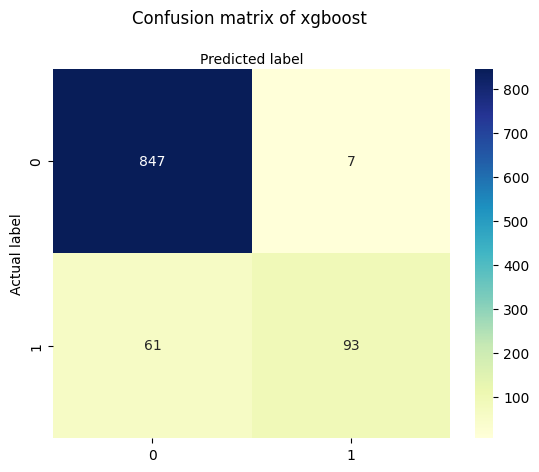

classification_report for xgboost :
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       854
           1       0.93      0.60      0.73       154

    accuracy                           0.93      1008
   macro avg       0.93      0.80      0.85      1008
weighted avg       0.93      0.93      0.93      1008

 calcul complexité for xgboost  0.7756686210632324
auc for xgboost  79.78496912923143


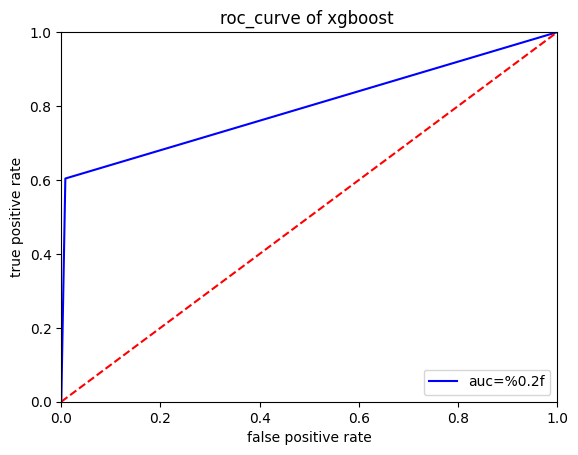

In [67]:
###########xgboost###################################################
import xgboost 
modelxgb =xgboost.XGBClassifier(random_state=0,n_estimators=65,max_depth=5,use_label_encoder=False).fit(x_train,train_label)
predxgb = modelxgb.predict(x_test)
metric('xgboost', modelxgb, x_train, train_label, test_label, predxgb)

accuracy_score for Decision Tree  86.11111111111111


<Figure size 640x480 with 0 Axes>

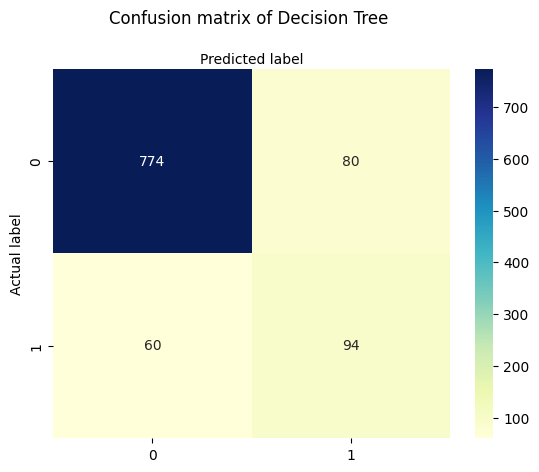

classification_report for Decision Tree :
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       854
           1       0.54      0.61      0.57       154

    accuracy                           0.86      1008
   macro avg       0.73      0.76      0.75      1008
weighted avg       0.87      0.86      0.86      1008

 calcul complexité for Decision Tree  0.18399953842163086
auc for Decision Tree  75.835639770066


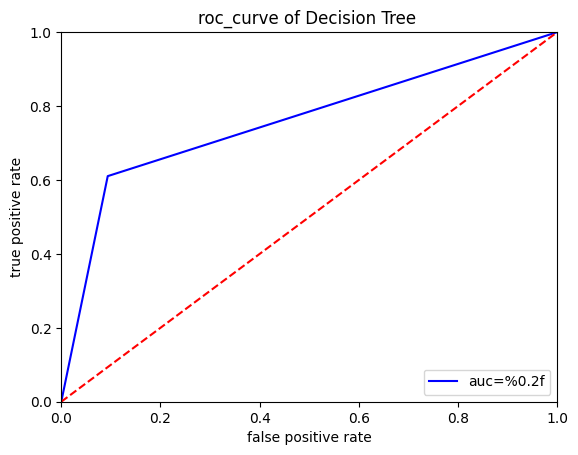

In [68]:
#######################DecisionTree###################################

from sklearn.tree import DecisionTreeClassifier
modeldt = DecisionTreeClassifier(random_state=0).fit(x_train,train_label)
preddt=modeldt.predict(x_test)
metric('Decision Tree', modeldt, x_train, train_label, test_label, preddt)

C:\Users\Maalaoui\AppData\Local\Temp\ipykernel_1148\3817542025.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelrf = RandomForestClassifier(random_state=0,n_estimators=100).fit(x_train,train_label)


accuracy_score for Random Forest  90.67460317460318


<Figure size 640x480 with 0 Axes>

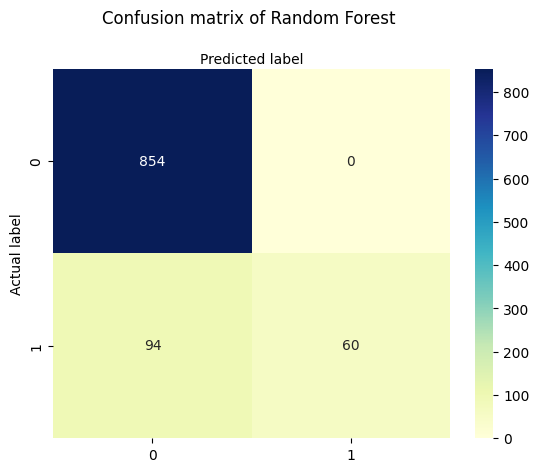

classification_report for Random Forest :
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       854
           1       1.00      0.39      0.56       154

    accuracy                           0.91      1008
   macro avg       0.95      0.69      0.75      1008
weighted avg       0.92      0.91      0.89      1008



C:\Users\Maalaoui\AppData\Local\Temp\ipykernel_1148\3309228484.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,train_label)


 calcul complexité for Random Forest  1.8296864032745361
auc for Random Forest  69.48051948051948


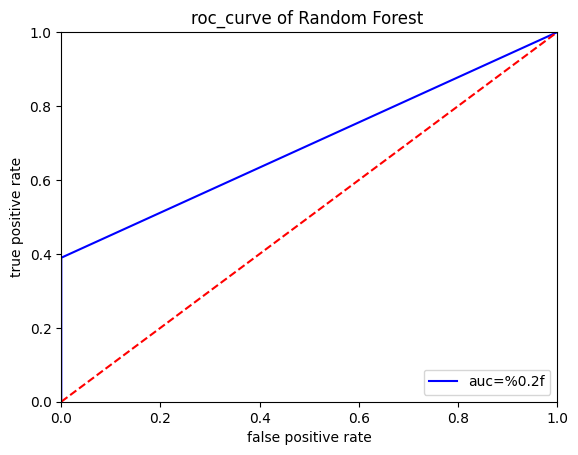

In [73]:
####################################################################
from sklearn.ensemble import RandomForestClassifier
modelrf = RandomForestClassifier(random_state=0,n_estimators=100).fit(x_train,train_label)
predrf=modelrf.predict(x_test)
metric('Random Forest', modelrf, x_train, train_label, test_label, predrf)

c:\users\maalaoui\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_score for svm binaire  89.18650793650794


<Figure size 640x480 with 0 Axes>

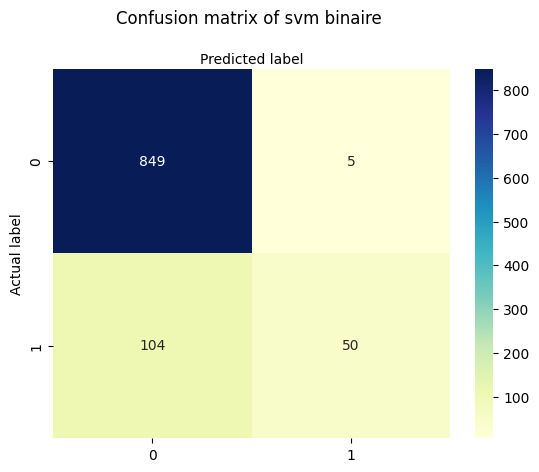

classification_report for svm binaire :
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       854
           1       0.91      0.32      0.48       154

    accuracy                           0.89      1008
   macro avg       0.90      0.66      0.71      1008
weighted avg       0.89      0.89      0.87      1008



c:\users\maalaoui\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 calcul complexité for svm binaire  0.2290327548980713
auc for svm binaire  65.94102618692783


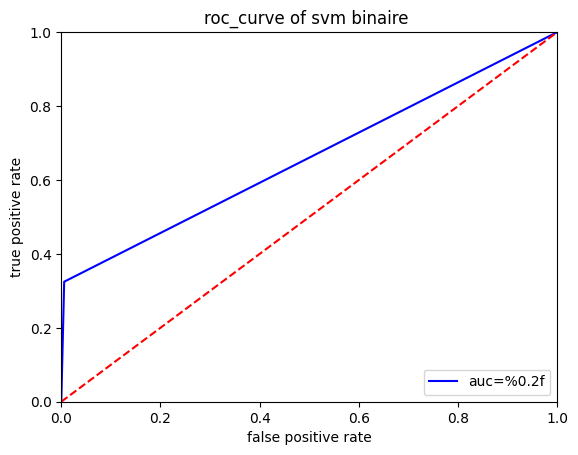

In [70]:
##############################################################################
from sklearn import svm
modelsvc=svm.SVC(kernel='rbf').fit(x_train,train_label)
predsvc=modelsvc.predict(x_test)
metric('svm binaire', modelsvc, x_train, train_label, test_label, predsvc)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


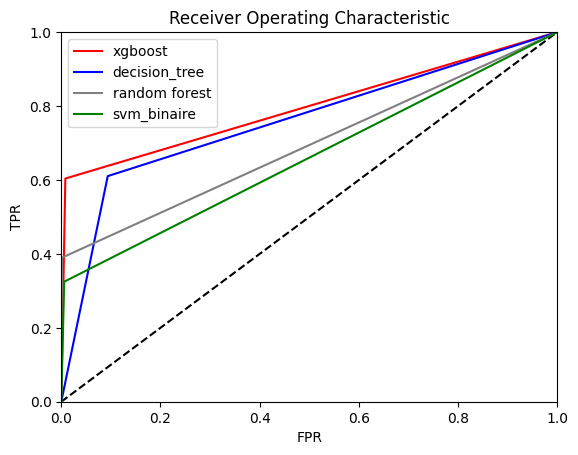

In [71]:
#####roc comparison
from sklearn.metrics import roc_curve
fp, tp, thressholds=roc_curve(test_label, predxgb, pos_label=1)

fp1, tp1, thressholds=roc_curve(test_label, preddt, pos_label=1)

fp2, tp2, thressholds=roc_curve(test_label, predrf, pos_label=1)

fp3, tp3, thressholds=roc_curve(test_label, predsvc, pos_label=1)

 
plt.title('receiver operation characteristic')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], 'k--')
plt.plot(fp, tp, color='red', label= "xgboost")
plt.plot(fp1, tp1, color='blue', label= "decision_tree")
plt.plot(fp2, tp2, color= 'gray',label= "random forest")
plt.plot(fp3, tp3, color= 'green',label= "svm_binaire")
plt.legend()
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()